In [302]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import datetime

In [303]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,7)})

#const
path = os.path.join('..', 'data')
cols = ['Date', 'Time']

### Data cleaning

In [304]:
men_marathon = pd.read_csv(os.path.join(path, 'Men marathon.csv'))
men10km = pd.read_csv(os.path.join(path, 'Men 10km.csv'))
men100m = pd.read_csv(os.path.join(path, 'Men 100m.csv'))
men400m = pd.read_csv(os.path.join(path, 'Men 400m.csv'))

women_marathon = pd.read_csv(os.path.join(path, 'Women marathon.csv'))
women10km = pd.read_csv(os.path.join(path, 'Women 10km.csv'))
women100m = pd.read_csv(os.path.join(path, 'Women 100m.csv'))
women400m = pd.read_csv(os.path.join(path, 'Women 400m.csv'))

In [305]:
def clean_data(filename):
    if filename == 'Men 100m.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Mark', 'Date']]
        df = df.rename(columns={'Mark':'Time'})
    else:
        df = pd.read_csv(os.path.join(path, filename))[['Date', 'Time']]
        
    df.dropna(subset=['Time'], axis=0, how='all', inplace=True)
    
    if filename in ('Men 10km.csv', 'Women 10km.csv', 'Men marathon.csv', 'Women marathon.csv'):
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{2}.\d{0,2})', expand=False)
    else:
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{1,4})', expand=False)
    
    '''if filename in ('Men marathon.csv', 'Women marathon.csv', 'Men 400m.csv', 'Women 100m.csv', 'Women 400m.csv'):
        df['Date'] = df['Date'].str.extract(r'^(\w{3,9}\s\d{1,22},\d{4})', expand=False)
        print(df.head())
        #df['Date'] = pd.to_datetime(df['Date'])
    else:
        df['Date'] = pd.to_datetime(df['Date'])
    
    #df = df.sort_values(by='Date')
    '''
    return df

In [306]:
men_marathon = clean_data('Men marathon.csv')
men10km = clean_data('Men 10km.csv')
men100m = clean_data('Men 100m.csv')
men400m = clean_data('Men 400m.csv')

women_marathon = clean_data('Women marathon.csv')
women10km = clean_data('Women 10km.csv')
women100m = clean_data('Women 100m.csv')
women400m = clean_data('Women 400m.csv')


* marathon

In [307]:
women_marathon.head()[cols]

,Date,Time
0,"April 13, 2003",2:15:25
1,"April 17, 1983",2:25:28
2,"April 17, 2005",2:17:42
3,"April 18, 1983",2:22:43
4,"April 19, 1998",2:20:47


In [308]:
men_marathon.head()[cols]

,Date,Time
0,"April 14, 2002",2:05:38
1,"April 17, 1988",2:06:50
2,"April 19, 1947",2:25:39
3,"April 20, 1985",2:07:12
4,"April 26, 1980",2:09:01


* 10km

In [309]:
women10km.head()[cols]

,Date,Time
0,12.08.2016,29:17.45
1,1967-03-26,38:06.4
2,1975-08-20,34:01.4
3,1966,39:25.0
4,1966,39:10.0


In [310]:
men10km.head()[cols]

,Date,Time
0,1904-11-05,31:02.4
1,18.08.1989,27:08.23
2,13.07.1973,27:30.8
3,01.06.1954,28:54.2
4,01.11.1953,29:01.6


* 100m

In [311]:
women100m.head()[cols]

,Date,Time
0,"July 25, 1976[1]",11.01
1,"July 2, 1967[1]",11.1
2,"October 14, 1968",11.1
3,"June 2, 1928",12.0
4,"July 18, 1970[1]",11.0


In [312]:
men100m.head()[cols]

,Date,Time
0,1960-06-21 00:00:00,10.0
1,2007-09-09 00:00:00,9.74
2,2006-06-11 00:00:00,9.77
3,2005-06-14 00:00:00,9.77
4,2006-08-18 00:00:00,9.77


* 400m

In [313]:
women400m.head()[cols]

,Date,Time
0,9 May 1976[1],49.77
1,18 September 1969[1],51.7
2,22 June 1974[1],49.9
3,22 June 1976[1],49.75
4,29 July 1976[1],49.29


In [314]:
men400m.head()[cols]

,Date,Time
0,"May 25, 1963[1]",44.9
1,"June 19, 1936[1]",46.1
2,"March 26, 1932[1]",46.4
3,"August 5, 1932[1]",46.2
4,"August 17, 1988[1]",43.29


-------

In [315]:
def seconds(time_string):
    m,s = time_string.split(':')
    return 60*int(m)+float(s)

def seconds2(time_string):
    h,m,s = time_string.split(':')
    return int(h)*3600+60*int(m)+float(s)

women_marathon['Time'][39] = '5:40:00'

In [316]:
for x in [men10km,women10km]:
    for i in range(len(x['Time'])):
        x['Time'][i] = seconds(str(x['Time'][i]))   

In [317]:
for x in [men_marathon,women_marathon]:
    for i in range(len(x['Time'])):
        x['Time'][i] = seconds2(str(x['Time'][i]))     

In [318]:
women_marathon

,Date,Time
0,"April 13, 2003",8125.0
1,"April 17, 1983",8728.0
2,"April 17, 2005",8262.0
3,"April 18, 1983",8563.0
4,"April 19, 1998",8447.0
5,"April 21, 1975",9744.0
6,"April 21, 1985",8466.0
7,"April 23, 2017",8221.0
8,"December 1, 1974",9834.0
9,"December 16, 1963[nb 8]",13027.0


### BEST

In [334]:
best_men_marathon = float(min(men_marathon['Time']))
best_men10km = float(min(men10km['Time']))
best_men100m = float(min(men100m['Time']))
best_men400m = float(min(men400m['Time']))

best_women_marathon = float(min(women_marathon['Time']))
best_women10km = float(min(women10km['Time']))
best_women100m = float(min(women100m['Time']))
best_women400m = float(min(women400m['Time']))

Text(0.5, 1.0, 'Czas na poszczególnych dystansach')

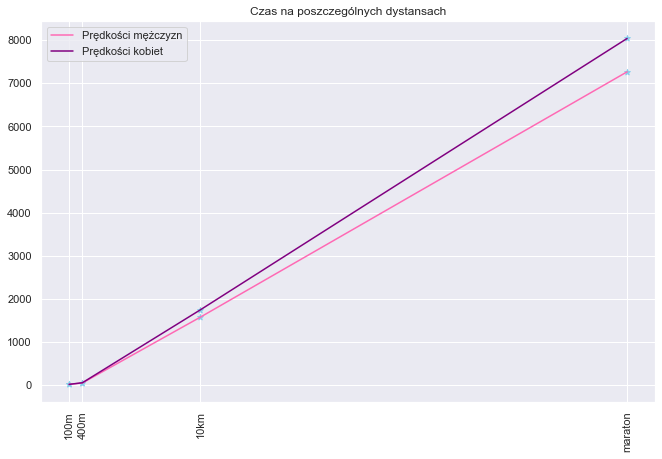

In [349]:
best_men = np.array([best_men100m,best_men400m,best_men10km,best_men_marathon])
best_women = np.array([best_women100m,best_women400m,best_women10km,best_women_marathon])
distance = [100,1100,10**4,42.194*10**3]
plt.plot(distance, best_men, color='hotpink',label='Prędkości mężczyzn')
plt.plot(distance, best_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, best_men, color='skyblue',marker='*')
plt.scatter(distance, best_women, color='skyblue',marker='*')
plt.xticks(distance, ['100m','400m','10km','maraton'],rotation=90)
plt.legend()
plt.title('Czas na poszczególnych dystansach')

Text(0.5, 1.0, 'Czas na dystansach 100m i 400m')

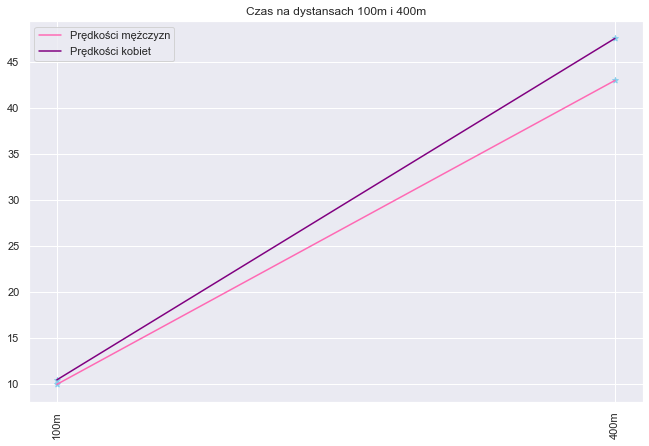

In [348]:
best_men = np.array([best_men100m,best_men400m])
best_women = np.array([best_women100m,best_women400m])
distance = [100,1100]
plt.plot(distance, best_men, color='hotpink',label='Prędkości mężczyzn')
plt.plot(distance, best_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, best_men, color='skyblue',marker='*')
plt.scatter(distance, best_women, color='skyblue',marker='*')
plt.xticks(distance, ['100m','400m'],rotation=90)
plt.legend()
plt.title('Czas na dystansach 100m i 400m')

Text(0.5, 1.0, 'Prędkości na poszczególnych dystansach')

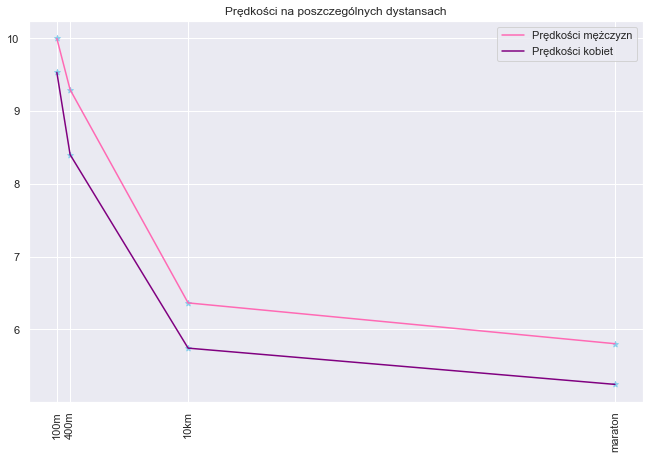

In [347]:
best_men = np.array([best_men100m,best_men400m,best_men10km,best_men_marathon])
best_women = np.array([best_women100m,best_women400m,best_women10km,best_women_marathon])
distance = [100,1100,10**4,42.194*10**3]
tempo_men = [100/float(best_men100m),400/float(best_men400m),10**4/float(best_men10km),(42.194*10**3)/float(best_men_marathon)]
tempo_women = [100/float(best_women100m),400/float(best_women400m),10**4/float(best_women10km),(42.194*10**3)/float(best_women_marathon)]
plt.plot(distance, tempo_men, color='hotpink', label='Prędkości mężczyzn')
plt.plot(distance, tempo_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, tempo_men, color='skyblue', marker='*')
plt.scatter(distance, tempo_women, color='skyblue', marker='*')
plt.xticks(distance, ['100m','400m','10km','maraton'],rotation=90)
plt.legend()
plt.title('Prędkości na poszczególnych dystansach')